# O problema da MLP para entradas com maior dimensionalidade

Um Multi Layer Perceptron recebe um vetor como entrada, ou seja, uma entrada de **uma** dimensão. Ao análisar uma imagem com N pixels, devemos linearizar a matriz de pixels para apenas uma dimensão. Com isso, o MLP terá camadas escondidas de N neurônios.

Se a imagem possui resolução 256 por 256, teremos 256² neurônios na rede e 256^4 pesos (conexões entre neurônios), totalizando mais de 4 bilhões de pesos. Essa rede ocuparia muito espaço apenas para armazenamento.

# Imagens

Imagens são volumes (RGB). Cada pixel armazena pelo menos 3 valores:

- Valor para o vermelho (R);
- Valor para o verde (G);
- Valor para o azul (B).

Se temos uma imagem 2656x256, temos então 256x256x3 pixels, ou 196608. Isso torna totalmente inviável uma rede totalmente conectada como uma MLP.

# **Convolutional Neural Networks (CNN)**

Consegue trabalhar com volumes 3D (altura, largura e profundidade). A entrada seria uma imagem, e as camadas internas teriam um mapa de características dessa imagem. Ou seja, redes neurais profundas irão transformar a imagem em mapas de características. Dessa forma, cada neuônio da rede irá analisar uma pequena parte da imagem.

**Obs:** Tanto a imagem quanto o mapa de características são volumes.

As principais operações das CNNs são:

- **Convolução:** Tranformação da imagem em características;
- **Pooling:** Processo de subamostragem.

O processo então é basicamente alternar entre transformação e subamostragem. Quanto mais profunda a rede, mais mapas de caracterização serão criados. As camadas de uma CNN podem ser dos tipos:

- Convolucional;
- Pooling (Pool);
- Totalmente Conectada (FC): Camada utilizada para inferência, como classificação e regressão, que operam em cima de camadas de alta dimensionalidade.

O aprendizado de uma CNN é hierárquico. Em cima de uma característica, se aprende outra. Dessa forma, as primeiras camadas aprendem características de baixo nível enquanto as últimas camadas aprendem características de alto nível.

- **Baixo nível:** Retas, bordas e formas rudimentares;
- **Médio nível:** Cores, formas pouco complexas, frequências. Olho do animal, por exemplo;
- **Alto nível:** A cabeça de um animal, por exemplo.

## Resumo

A CNN transforma hierarquicamente a imagem em características de cada vez mais alto nível, e então realiza a inferência.



In [2]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch
from torchvision import datasets, transforms

# Aplicações de uma CNN: **Classificação**

Do módulo datasets iremos importar o pacote MNIST, que são números escritos à mão para classificação.

In [ ]:
MNIST = datasets.MNIST('.',  # onde salvar
                       train = True, 
                       transform = transforms.ToTensor(), # já no carregamento transformamos os dados em tensores
                       target_transform = None, 
                       download = True)

Sample dos dados do MNIST:

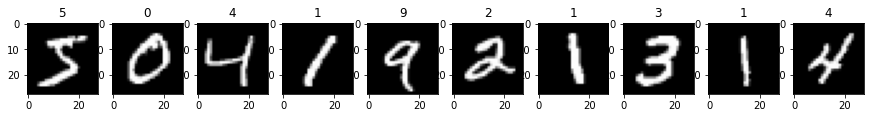

In [12]:
fig, axs = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    dado, label = MNIST[i]
    axs[i].imshow(dado[0], cmap='gray')
    axs[i].set_title(str(label))

In [7]:
dado, label = MNIST[0]
print("Tipo dados:", type(dado))
print("Tipo label:", type(label))
print("Formato do dado:", dado.size())

Tipo dados: <class 'torch.Tensor'>
Tipo label: <class 'int'>
Formato do dado: torch.Size([1, 28, 28])


O formato do dado atribuído pelo pytorch é 1x28x28. Isso significa que possui 1 canal de cor e 28x28 pixels. O pacote MNIST é preto e branco, por isso possui apenas 1 canal de cor. **Em geral, os formatos são Cor x Altura x Largura**.

**A última camada de uma CNN cujo objetivo é classificar os dados do MNIST (algarismos de 0 à 9) deve possuir 10 neurônios. Ou seja, um neurônio para cada classe. Nesse caso, temos 10 classes (0, 1, 2, 3, 4, 5, 6, 7, 8, 9).**

Nesse contexto, a última camada de uma CNN sempre deve possuir N neurônios, sendo N a quantidade de classes do problema.

# Aplicações de uma CNN: **Detecção**

Do módulo datasets iremos importar o pacote VOCDetection, na qual oferece imagens para treinar a detecção de certos objetos, como pessoas, carros, etc.

http://host.robots.ox.ac.uk/pascal/VOC/

In [ ]:
VOC = datasets.VOCDetection('.',  # onde salvar
                                image_set='train',
                                transform = transforms.ToTensor(), # já no carregamento transformamos os dados em tensores
                                target_transform = None, 
                                download = True)

In [24]:
dado, label = VOC[0]
print("Tipo do dado:", type(dado))
print("Tipo do label:", type(label))
print("Formato do dado:", dado.size())

Tipo do dado: <class 'torch.Tensor'>
Tipo do label: <class 'dict'>
Formato do dado: torch.Size([3, 442, 500])


O formato dos dados do pacote VOC é 3x442x500, isso quer dizer que as imagens possuem 3 canais de cor, 442px de altura e 500px de largura. Enquanto o label é do tipo dicionário com diversas informações:

In [25]:
dado, label = VOC[0]
label

{'annotation': {'filename': '2008_000008.jpg',
  'folder': 'VOC2012',
  'object': [{'bndbox': {'xmax': '471',
     'xmin': '53',
     'ymax': '420',
     'ymin': '87'},
    'difficult': '0',
    'name': 'horse',
    'occluded': '1',
    'pose': 'Left',
    'truncated': '0'},
   {'bndbox': {'xmax': '289', 'xmin': '158', 'ymax': '167', 'ymin': '44'},
    'difficult': '0',
    'name': 'person',
    'occluded': '0',
    'pose': 'Unspecified',
    'truncated': '1'}],
  'segmented': '0',
  'size': {'depth': '3', 'height': '442', 'width': '500'},
  'source': {'annotation': 'PASCAL VOC2008',
   'database': 'The VOC2008 Database',
   'image': 'flickr'}}}

A biblioteca Pytorch adota o canal de cor como sendo a primeira dimensão dos dados, porém bibliotecas de visualização como o matplotlib expressam o canal de cor na última dimensão. Por conta disso, devemos fazer uma permuta nas dimensões dos dados:

In [26]:
dado = dado.permute(1,2,0) # jogando a dimensão 0 para a última posição

Agora que temos as dimensões certas para o matplotlib, podemos plotar esse dado:

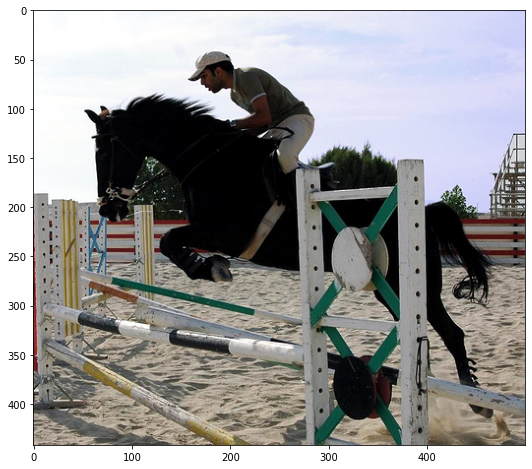

In [27]:
plt.figure(figsize=(10,8))
plt.imshow(dado)

No label da imagem, temos as informações:

    'bndbox': {'xmax': '471',
     'xmin': '53',
     'ymax': '420',
     'ymin': '87'},
     ...

Que são as coordenadas que definem um retângulo em volta do objeto em questão:

    xmin, ymin
              O----------
              |         |
              |         |
              ----------O
                        xmax, ymax

Podemos extrair esses dados do dicionário e plotá-los:

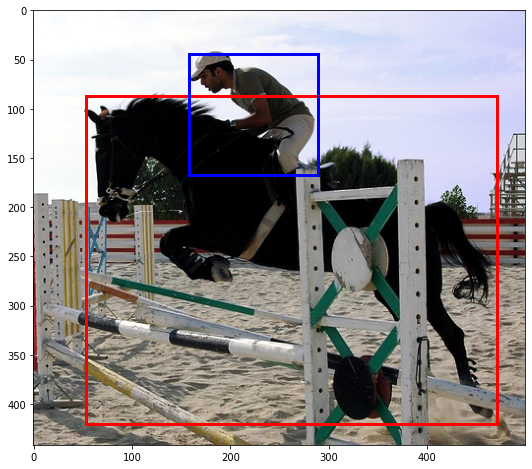

In [33]:
fig, ax = plt.subplots(figsize=(10,8))

for i in range(2): # um loop para cada objeto da imagem. Nessa imagem são dois: Cavalo e pessoa
    bbox = label['annotation']['object'][i]['bndbox']
    xmax = int(bbox['xmax'])
    xmin = int(bbox['xmin'])
    ymax = int(bbox['ymax'])
    ymin = int(bbox['ymin'])

    w, h = xmax-xmin, ymax-ymin

    color = 'red'
    if i == 1:
        color = 'blue'

    rect = patches.Rectangle((xmin, ymin), w, h, fill=False, color=color, linewidth=3)
    ax.add_patch(rect)

ax.imshow(dado)
plt.show()

**Como será a última camada de uma CNN cujo objetivo é detectar objetos?**

Um problema de detecção na verdade é um problema de regressão, onde devemos encontrar 4 valores:

- xmin e xmax;
- ymin e ymax.

Dessa forma, a última camada da CNN com esse propósito deve ter 4 neurônios, um para cada valor.

# Aplicações de uma CNN: **Segmentação**

Diferente de um problema de detecção onde se atribui um retângulo ao objeto encontrado, num problema de segmentação definimos um mapa pixel a pixel (máscara) que definem o objeto.

O módulo PascalVOC também possui um pacote para segmentação. Nesse caso, ambos dados e labels são imagens: 

In [35]:
VOCseg = datasets.VOCSegmentation('.',
                                  image_set='train',
                                  download=True,
                                  transform=transforms.ToTensor(),
                                  target_transform=transforms.ToTensor())

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to .


In [39]:
dado, label = VOCseg[0]

print("Tipo dado:", type(dado))
print("Tipo label:", type(label))
print("Formato do dado:", dado.size())
print("Formato do label:", label.size())

Tipo dado: <class 'torch.Tensor'>
Tipo label: <class 'torch.Tensor'>
Formato do dado: torch.Size([3, 281, 500])
Formato do label: torch.Size([1, 281, 500])


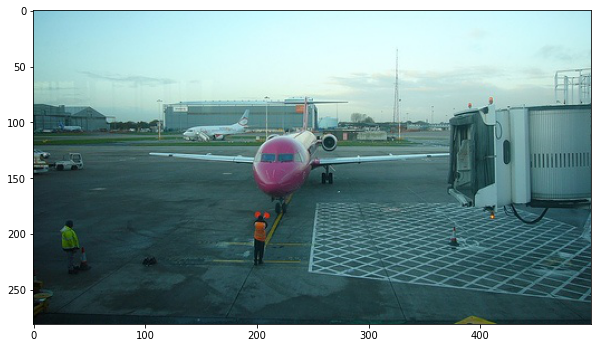

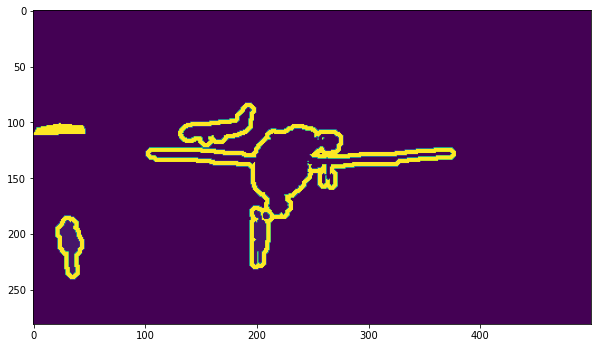

In [40]:
# plot

dado = dado.permute(1,2,0)

plt.figure(figsize=(10,8))
plt.imshow(dado)

plt.figure(figsize=(10,8))
plt.imshow(label[0]) # [0] para ignorar a dimensao da cor

Em problemas de segmentação as CNN são redes **TOTALMENTE CONVOLUCIONAIS**. Ou seja, não possuem última camada MLP como as demais aplicações.